<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/%EC%B7%A8%EC%97%85_%EC%B4%88%EA%B8%89_7%EC%A1%B0_%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#패스트캠퍼스 데이터 분석

##패스트 캠퍼스 데이터 준비

###미니프로젝트 주제

패스트캠퍼스 효과적인 마케팅 대안과 매출증가를 위한 방안 도출

###패스트 캠퍼스 데이터 불러오기

In [68]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# 모듈 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [70]:
# 한글 글꼴 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [71]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/패스트캠퍼스 데이터분석/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


## 데이터 결측치 및 타입 확인

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [73]:
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

###데이터 전처리

In [74]:
# Completed_at 타입 datetime 으로 바꾸기
df['completed_at'] = pd.to_datetime(df['completed_at'])
df.dtypes

id                                 int64
customer_id                      float64
course_id                        float64
type                              object
state                             object
course_title                      object
category_title                    object
format                            object
completed_at              datetime64[ns]
transaction_amount                 int64
coupon_title                      object
coupon_discount_amount           float64
sale_price                       float64
tax_free_amount                  float64
pg                                object
method                            object
subcategory_title                 object
marketing_start_at        datetime64[ns]
dtype: object

In [75]:
# 날짜 월,일,요일,시간 세분화
num_to_day = {
    0 : '월요일',
    1 : '화요일',
    2 : '수요일',
    3 : '목요일',
    4 : '금요일',
    5 : '토요일',
    6 : '일요일',
}

df['pay_ym']=df['completed_at'].dt.strftime("%Y-%m")   ## 년월 컬럼
df['Day'] = [num_to_day[i] for i in df['completed_at'].dt.dayofweek] ## 요일컬럼
df['Time']=  df['completed_at'].dt.hour  ##시간컬럼
df['Date']=  df['completed_at'].dt.day   ##일자컬럼

In [76]:
# 개인 사용자들의 데이터를 확인하기 위해 format에서 기업교육 계약, 정부 사업인 B2B, B2G 제거 후 시작
df = df[df.format.isin(['B2B', 'B2B 온라인', 'B2G'])==False] 

df2=df[(df['type']=='PAYMENT') & (df['state']=='COMPLETED')]  # 결제 완료 데이터 (3, 9월 제거)
idx = df2[df2['pay_ym'] == "2021-03"].index
df2 =df2.drop(idx)
idx = df2[df2['pay_ym'] == "2021-09"].index
df2 =df2.drop(idx)                                           

df3=df[(df['type']=='PAYMENT') | (df['type']=='REFUND')]      # 결제 완료 및 환불 데이터
df3 = df3[(df['state']=='COMPLETED')]

Refdf=df[(df['type']=='REFUND') & (df['state']=='COMPLETED')] # 환불만 있는 데이터

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



##데이터 분포 확인 및 분석

###카테고리 데이터 분석

In [77]:
# 카테고리  별 강의 구매 횟수 확인
df["category_title"].value_counts()

프로그래밍       33067
데이터사이언스     14029
업무 생산성      13317
디자인         12009
영상/3D       10260
마케팅          9845
부동산/금융       5518
투자/재테크       2501
크리에이티브       2231
지식콘텐츠          56
비즈니스           40
파이낸스           24
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

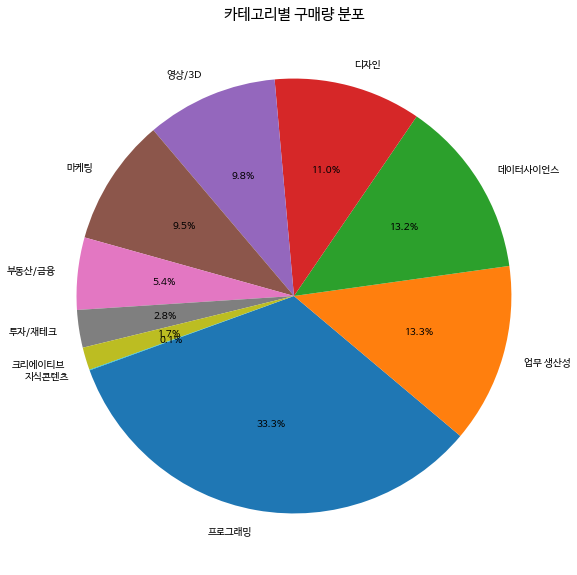

In [78]:
# 카테고리 별 구매량 분포 파이 그래프로 시각화
plt.figure(figsize=(10,10))
temp_series = df2['category_title'].value_counts().head(10)     # 구매량 top 10
labels = np.array(temp_series.index)
sizes = np.array((temp_series / temp_series.sum())* 100)
plt.pie(sizes, labels=labels, autopct='%1.1f%%' , startangle= 200)
plt.title('카테고리별 구매량 분포', fontsize= 15)
plt.show()

프로그래밍 관련 강의가 가장 많이 팔렸다.

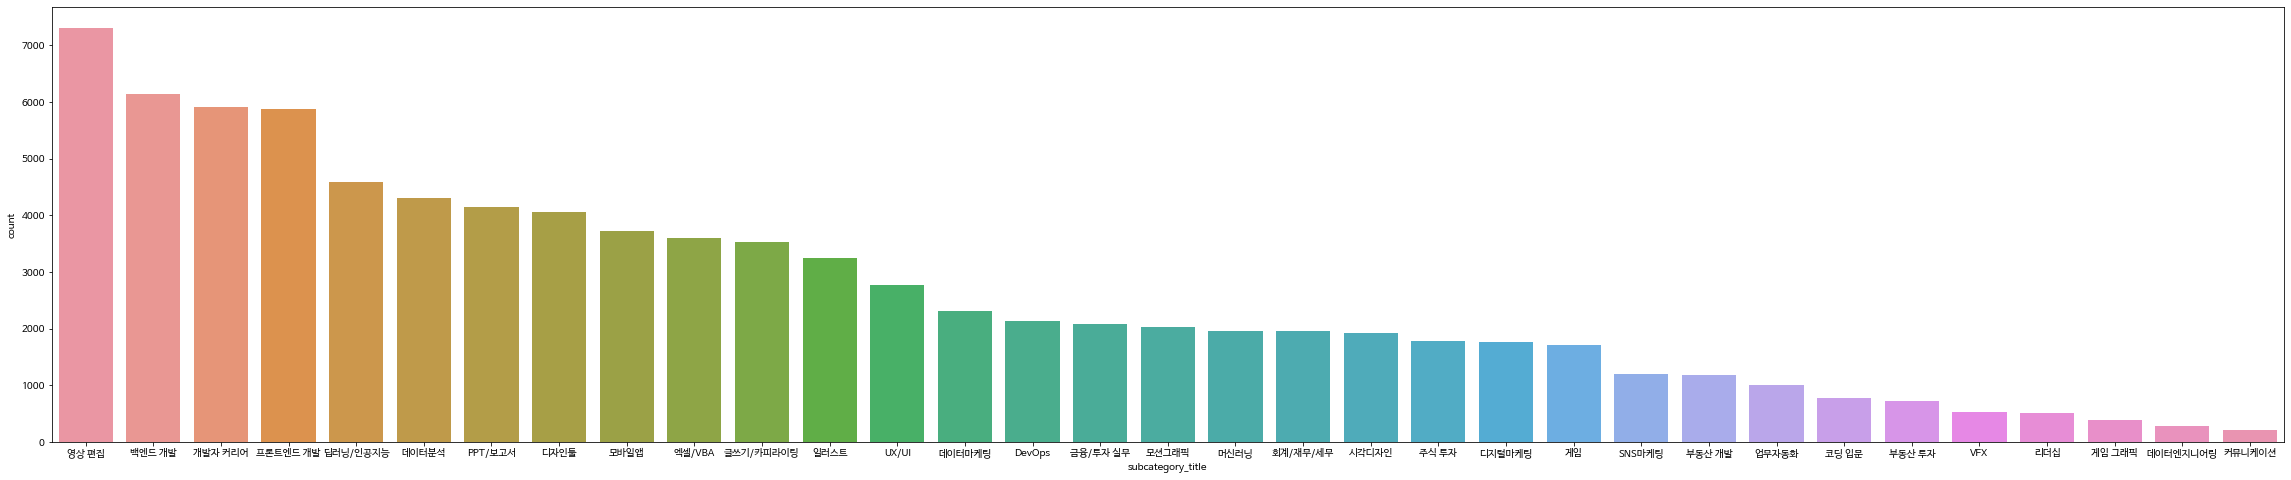

In [79]:
# 서브카테고리 별 강의 구매 횟수 시각화
fig = plt.figure(figsize=(40,8))
sns.countplot(data = df, x = "subcategory_title", 
              order = df['subcategory_title'].value_counts().index)

서브카테고리로 분류시 영상/3D카테고리에 속해있는 영상 편집 강의가 가장 많았다.

In [80]:
#서브 카테고리 트리맵을 위한 분류
sub = df.groupby(['category_title', 'subcategory_title'])[['id']].count()
sub

id
category_title subcategory_title      
데이터사이언스        데이터분석              4302
               데이터엔지니어링            275
               딥러닝/인공지능           4590
               머신러닝               1958
디자인            UX/UI              2775
               디자인툴               4053
               시각디자인              1927
               일러스트               3238
마케팅            SNS마케팅             1190
               글쓰기/카피라이팅          3524
               데이터마케팅             2306
               디지털마케팅             1754
부동산/금융         금융/투자 실무           2075
               부동산 개발             1179
               회계/재무/세무           1948
업무 생산성         PPT/보고서            4150
               리더십                 511
               업무자동화               996
               엑셀/VBA             3591
               커뮤니케이션              204
영상/3D          VFX                 523
               게임 그래픽              385
               모션그래픽              2033
               영상 편집              7312
투자/재테크         부동산 투자              714
               주식 투자              1787
프로그래밍          DevOps             2136
               개발자 커리어            5918
               게임                 1707
               모바일앱               3724
               백엔드 개발             6144
               코딩 입문               782
               프론트엔드 개발           5878

In [81]:
# 강의 카테고리 서브 카테고리 별 분류 트리맵
from plotly import express as px
import seaborn as sns

tip_summ = sub.groupby(['category_title','subcategory_title'])['id'].max().reset_index()

fig = px.treemap(tip_summ,
                 path=['category_title','subcategory_title'],
                 values='id',
                 color='id',
                 color_continuous_scale='viridis')

fig.show()

In [82]:
# 카테고리 별 총 매출
how = {
    'transaction_amount' : np.sum
}
catr = df.groupby('category_title').agg(how)
catr = catr.sort_values('transaction_amount', ascending=False)

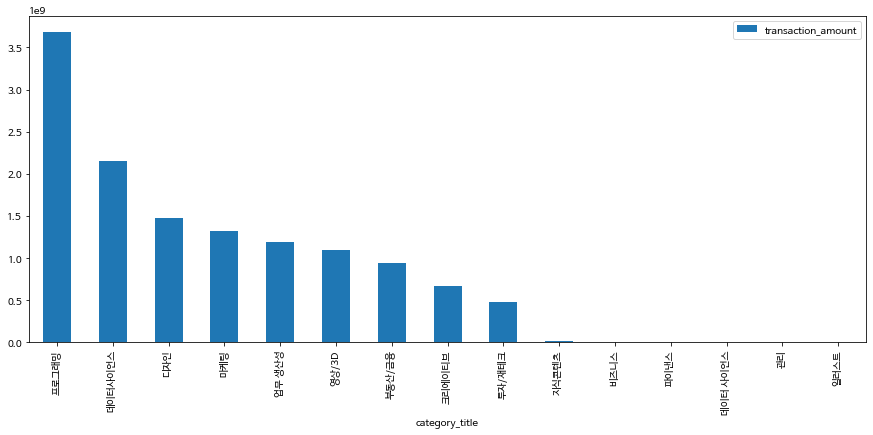

In [83]:
# 카테고리 별 총 매출 시각화
catr.plot.bar(figsize = (15,6))

매출이 높은 카테고리의 강의에 광고를 집중하면 매출 상승 효과를 기대할 수 있을 것이다.

###결제 시기 데이터 분석

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaf6df4c10>],
      dtype=object)

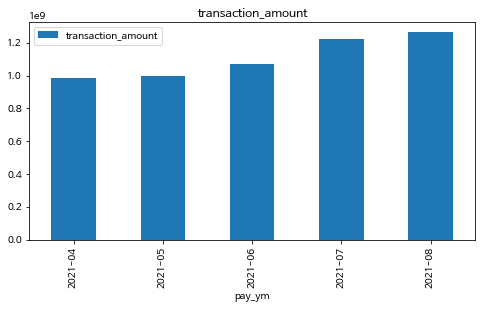

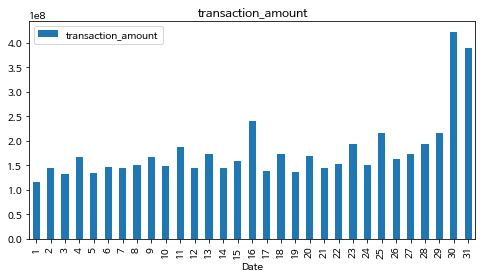

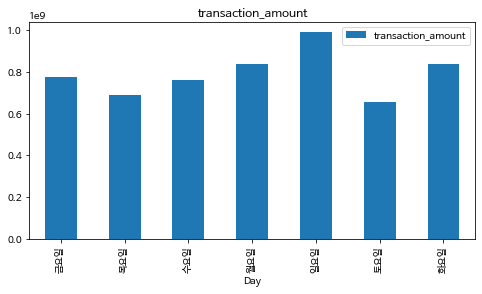

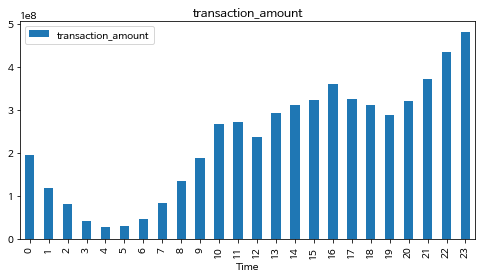

In [84]:
# 특정 월, 일, 요일, 시간에 따른 판매량 그래프
from matplotlib.axis import Axis
how= {
    'transaction_amount':np.sum
}
stat1=df2.groupby('pay_ym').agg(how)
stat2=df2.groupby('Date').agg(how)
stat3=df2.groupby('Day').agg(how)
stat4=df2.groupby('Time').agg(how)

stat1.plot.bar(subplots=True, figsize = (8,4))
stat2.plot.bar(subplots=True, figsize = (8,4))
stat3.plot.bar(subplots=True, figsize = (8,4))
stat4.plot.bar(subplots=True, figsize = (8.15,4))

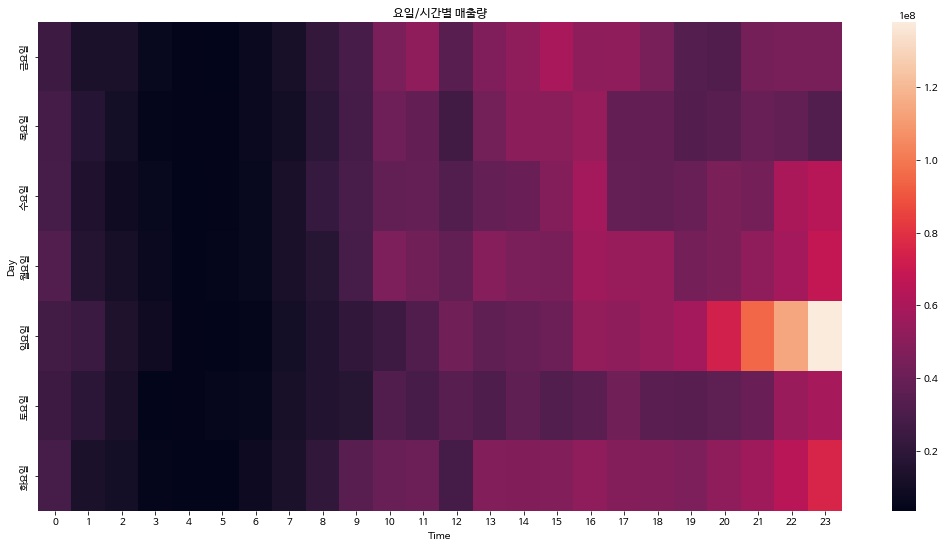

In [85]:
# 요일/시간 별 매출량 그래프
grouped_df = df2.groupby(['Day','Time'])['transaction_amount'].aggregate('sum').reset_index()
grouped_df = grouped_df.pivot('Day','Time','transaction_amount')

plt.figure(figsize = (18,9))
sns.heatmap(grouped_df)
plt.title('요일/시간별 매출량')
plt.show()

방학시즌인 7, 8월, 주말인 일요일, 월말인 30,31일, 그리고 밤 시간인 21~23시에 수입이 높게 나타난다.

그리고 요일/시간 별 매출량 그래프에서 일요일 20~23시에 매출량이 가장 높게 나타났다.

###재구매 데이터 분석

In [86]:
# 한 사람이 강의를 몇 회 구매했는지 확인
df3["customer_id"].value_counts() 

98685.0     53
427973.0    47
158374.0    42
50769.0     41
3189.0      40
            ..
544537.0     1
544348.0     1
537063.0     1
102796.0     1
610626.0     1
Name: customer_id, Length: 39092, dtype: int64

In [87]:
# 재구매 시 True, 1회 구매시 False 인 column 생성

repeat = df3.customer_id.value_counts().loc[df3.customer_id.value_counts() >= 2]
repeat_index=repeat.index
repeat_index

def repeat_order_func(x) :

    if repeat_index.isin([x]).any()==True:
        return '재구매자'
    else:
        return '1회 구매자'

df3['repeat_order'] = df3['customer_id'].map(repeat_order_func)
df3 = df3.drop_duplicates(['customer_id'])

In [88]:
# 1회 구매자 및 2회 이상 구매자 수 확인
df3['repeat_order'].value_counts()

1회 구매자    30103
재구매자       8989
Name: repeat_order, dtype: int64

In [89]:
# 강의를 재구매한 사람 비율
print(f'{"%.2f"% (8989/(30103+8989)*100)}%')

22.99%


강의를 2회 이상 구매한 사람이 전체의 약 23%

In [90]:
# 재구매자만 있는 데이터프레임
df_repeat_order = df3[df3.repeat_order.isin(['재구매자'])]

In [91]:
# 1회 구매자만 있는 데이터프레임
df_one_order = df3[df3.repeat_order.isin(['1회 구매자'])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



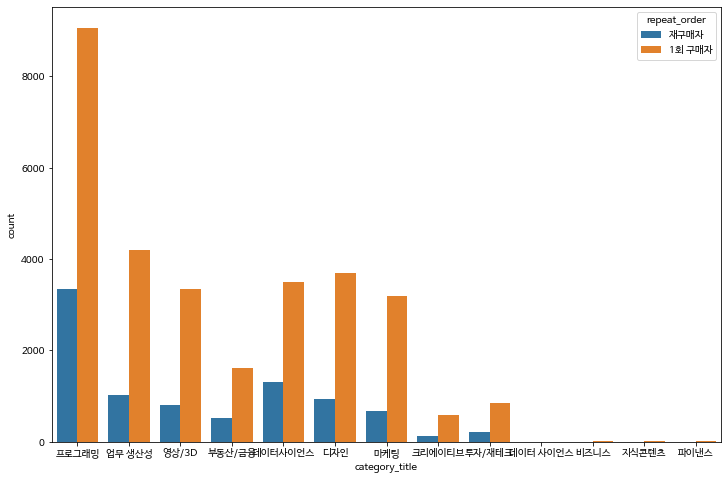

In [92]:
# 카테고리 별 1회 구매자와 재구매자의 구매 횟수 비교
plt.figure(figsize=(12,8))
sns.countplot('category_title',hue='repeat_order',data=df3)
plt.show()

In [93]:
# 카테고리 별 총 구매자 중 재구매자의 비율
df_repeat_one_rate = df_repeat_order['category_title'].value_counts().head(9) / (df_one_order['category_title'].value_counts().head(9) + df_repeat_order['category_title'].value_counts().head(9))
df_repeat_one_rate = df_repeat_one_rate.sort_values(ascending=False)
df_repeat_one_rate

데이터사이언스    0.274143
프로그래밍      0.269667
부동산/금융     0.242283
투자/재테크     0.204082
디자인        0.202755
업무 생산성     0.195164
영상/3D      0.192521
크리에이티브     0.191011
마케팅        0.176076
Name: category_title, dtype: float64

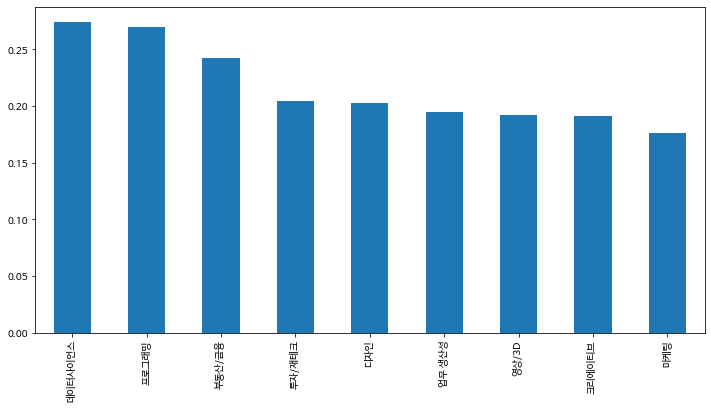

In [94]:
# 카테고리 별 총 구매자 중 재구매자의 비율
df_repeat_one_rate.plot.bar(figsize = (12,6))

1, 2위는 최근에 유망하다고 판단되는 카테고리, 

3, 4위는 재테크 관련 카테고리로 나타났다.


재구매자 비율이 높은 이유 (데이터사이언스, 프로그래밍, 부동산/금융, 투자재테크)

    1. 첫번째 들은 강의가 적성에 맞지 않아서 다른 강의를 선택 (-> 유망한 직종인 데이터 사이언스, 프로그래밍 관련 강의가 높음)

    2. 강의 한 번으로 충분하지 않아서 같은 카테고리에서 재구매 하게 됨 (데이터 사이언스, 프로그래밍)

    3. 패스트 캠퍼스를 이용했던 수강생들이 취업에 성공한 후 재테크 관련 강의를 재구매 


재구매자 비율이 낮은 이유 (업무 생산성, 영상/3D, 크리에이티브, 마케팅)

    1. 강의 한 번의 으로 충분하다고 판단함. (한 번에 끝내는~ 패키지가 많음) 



###환불 데이터 분석

In [95]:
# 결제 완료 value_counts
df2 = df2.drop_duplicates(['customer_id'])
df2['type'].value_counts()

PAYMENT    33109
Name: type, dtype: int64

In [96]:
# 환불한 사람 value_counts
Refdf = Refdf.drop_duplicates(['customer_id'])
Refdf['type'].value_counts()

REFUND    3247
Name: type, dtype: int64

In [97]:
# 전체 환불율
print(f'{"%0.2f"%(3247/(3247+33109)*100)}%')

8.93%


환불한 사람이 전체의 약 9%

####쿠폰 할인율 관련 

In [98]:
# 쿠폰 할인율 컬럼 추가
df2 = df2.fillna(0)
Refdf2 = Refdf.fillna(0)

df2['coupon_discount_rate'] = df2['coupon_discount_amount']/(df2['transaction_amount']+df2['coupon_discount_amount'])*100 
Refdf2['coupon_discount_rate'] = Refdf2['coupon_discount_amount']/(Refdf2['transaction_amount']+Refdf2['coupon_discount_amount'])*100

In [99]:
# 중복 제거
df2 = df2.drop_duplicates(['customer_id'])
df2['type'].value_counts()

PAYMENT    33109
Name: type, dtype: int64

In [100]:
# 중복 제거
Refdf2 = Refdf2.drop_duplicates(['customer_id'])
Refdf2['type'].value_counts()

REFUND    3247
Name: type, dtype: int64

In [101]:
# 쿠폰 할인율 별 구분
def discount_rate(x) :   
    if x == 0:
        return "미사용"
    elif x < 10: 
        return "~10%"
    elif x < 20: 
        return "~20%"
    elif x < 30: 
        return "~30%"
    elif x < 40: 
        return "~40%"
    elif x < 50:
        return "~50%"
    elif x < 60: 
        return "~60%"
    elif x < 70: 
        return "~70%"       

df2['coupon_discount_rate2'] = df2['coupon_discount_rate'].map(discount_rate)
Refdf2['coupon_discount_rate2'] = Refdf2['coupon_discount_rate'].map(discount_rate)

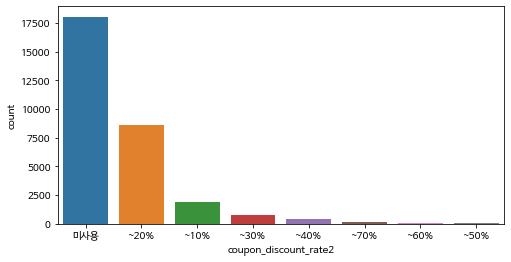

In [102]:
# 할인율 별 쿠폰 사용 횟수
fig = plt.figure(figsize=(8,4))                    
sns.countplot( data = df2, x = 'coupon_discount_rate2', order = df2['coupon_discount_rate2'].value_counts().index)

~20% 할인율이 가장 많이 적용된다.

In [103]:
# 쿠폰을 미사용한 사람의 데이터
df2n = df2[df2.coupon_discount_rate2.isin(['미사용'])]

In [104]:
Refdfn = Refdf2[Refdf2.coupon_discount_rate2.isin(['미사용'])]
Refdfn['coupon_discount_rate2'].value_counts()

미사용    3239
Name: coupon_discount_rate2, dtype: int64

In [105]:
# 전체 총 매출액
type_amount_total = df2.groupby('type').agg(how)
type_amount_total

,transaction_amount
type,
PAYMENT,4391197800


In [106]:
# 쿠폰 미사용자 총 매출액
type_amount_n = df2n.groupby('type').agg(how)
type_amount_n

,transaction_amount
type,
PAYMENT,2777744605


In [107]:
# 전체 환불액
type_amount_total_Ref = Refdf2.groupby('type').agg(how)
type_amount_total_Ref

,transaction_amount
type,
REFUND,-559991312


In [108]:
tp = type_amount_total.loc['PAYMENT','transaction_amount'] # 현재 전체 매출
np = type_amount_n.loc['PAYMENT','transaction_amount'] # 쿠폰 미사용자 전체 매출
r = -type_amount_total_Ref.loc['REFUND','transaction_amount'] # 총 환불액
print(f'환불 0%일 때 매출 : {tp + r}')
print(f'현재 전체 매출 : {tp}\n')
print(f'모든 쿠폰 미사용자가 5% 쿠폰 사용 시 매출 : {"%.2f"%((tp-np)+(np + r)*0.95)}')
print(f'모든 쿠폰 미사용자가 5% 쿠폰 사용 시 매출 상승률 : {"%.2f"%(((tp-np)+(np + r)*0.95)/tp*100-100)}%\n')
print(f'모든 쿠폰 미사용자가 10% 쿠폰 사용 시 매출 : {(tp-np)+(np + r)*0.9}')
print(f'모든 쿠폰 미사용자가 10% 쿠폰 사용 시 매출 상승률 : {"%.2f"%(((tp-np)+(np + r)*0.9)/tp*100-100)}%')

환불 0%일 때 매출 : 4951189112
현재 전체 매출 : 4391197800

모든 쿠폰 미사용자가 5% 쿠폰 사용 시 매출 : 4784302316.15
모든 쿠폰 미사용자가 5% 쿠폰 사용 시 매출 상승률 : 8.95%

모든 쿠폰 미사용자가 10% 쿠폰 사용 시 매출 : 4617415520.3
모든 쿠폰 미사용자가 10% 쿠폰 사용 시 매출 상승률 : 5.15%


쿠폰 사용 시에는 환불에 제약이 생기는 규정을 만든다면

모든 쿠폰 미사용자에게 5\~10% 쿠폰을 사용하게 할 시 약 5 ~ 9%의 매출 상승을 기대할 수 있다.

따라서 결제 중 쿠폰 미사용자에게 쿠폰을 사용하라는 메시지와 할인 금액을 띄운다면

쿠폰 사용율을 늘리고 환불율을 줄여 매출 상승의 효과를 기대할 수 있을 것이다.

####카테고리 관련

In [109]:
# 카테고리 별 환불 횟수
Refdf['category_title'].value_counts()

프로그래밍      1141
디자인         422
데이터사이언스     395
영상/3D       335
마케팅         317
업무 생산성      302
부동산/금융      130
크리에이티브      104
투자/재테크       96
파이낸스          2
비즈니스          2
Name: category_title, dtype: int64

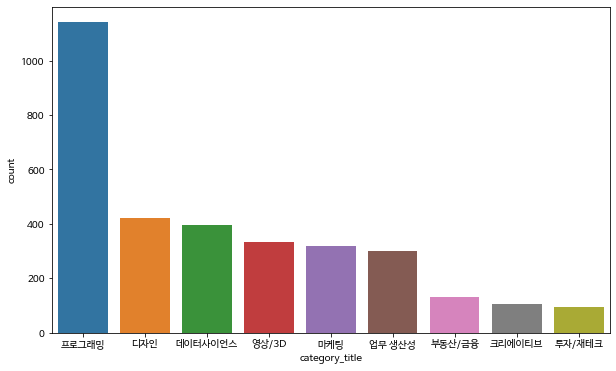

In [110]:
# 카테고리 별 환불 횟수 (상대적으로 판매 횟수가 적은 강의 제거(파이낸스, 비즈니스))
fig = plt.figure(figsize=(10,6))
sns.countplot( data = Refdf, x = 'category_title' , 
              order = Refdf['category_title'].value_counts().head(9).index )

In [111]:
# 카테고리 별 환불 비율
df_refund_rate = Refdf['category_title'].value_counts().head(9)/df3['category_title'].value_counts()*100 
df_refund_rate = df_refund_rate.sort_values(ascending=False)
df_refund_rate = df_refund_rate.dropna()
df_refund_rate

크리에이티브     14.606742
프로그래밍       9.187535
디자인         9.083082
투자/재테크      8.905380
데이터사이언스     8.203531
마케팅         8.172209
영상/3D       8.082027
부동산/금융      6.080449
업무 생산성      5.795433
Name: category_title, dtype: float64

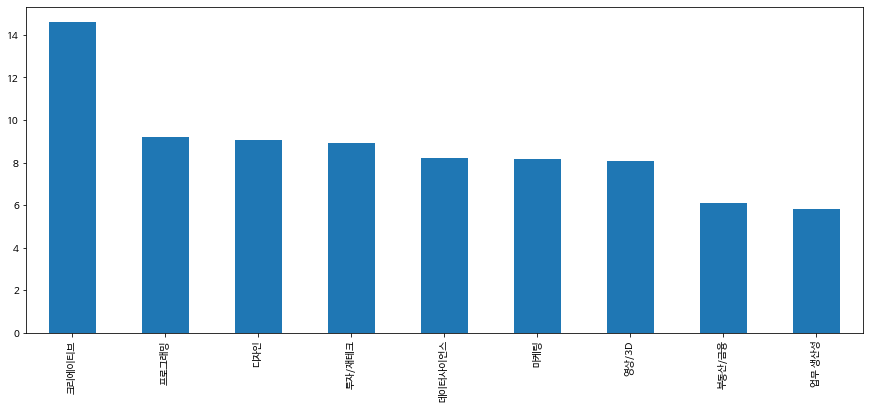

In [112]:
# 카테고리 별 환불 비율 그래프
df_refund_rate.plot.bar(figsize = (15,6)) 

In [113]:
# 서브카테고리 별 환불 비율
df_refund_rate_sub = Refdf['subcategory_title'].value_counts()/df3['subcategory_title'].value_counts()*100 
df_refund_rate_sub = df_refund_rate_sub.sort_values(ascending=False)
df_refund_rate_sub = df_refund_rate_sub.dropna()
df_refund_rate_sub

게임 그래픽       13.636364
데이터엔지니어링     12.500000
모바일앱         11.367127
일러스트         10.790835
VFX          10.756972
주식 투자         9.890110
UX/UI         9.868421
프론트엔드 개발      9.820585
코딩 입문         9.782609
SNS마케팅        9.456265
백엔드 개발        9.209988
머신러닝          9.144543
모션그래픽         8.519004
DevOps        8.184143
부동산 개발        8.078603
디자인툴          7.783641
데이터마케팅        7.570621
게임            7.530648
영상 편집         7.426075
데이터분석         7.337662
업무자동화         7.288630
개발자 커리어       7.168299
시각디자인         7.072136
디지털마케팅        6.906907
PPT/보고서       6.761108
딥러닝/인공지능      6.688103
글쓰기/카피라이팅     5.844573
부동산 투자        5.791506
엑셀/VBA        5.736715
금융/투자 실무      5.469679
회계/재무/세무      5.449591
커뮤니케이션        4.838710
리더십           4.838710
Name: subcategory_title, dtype: float64

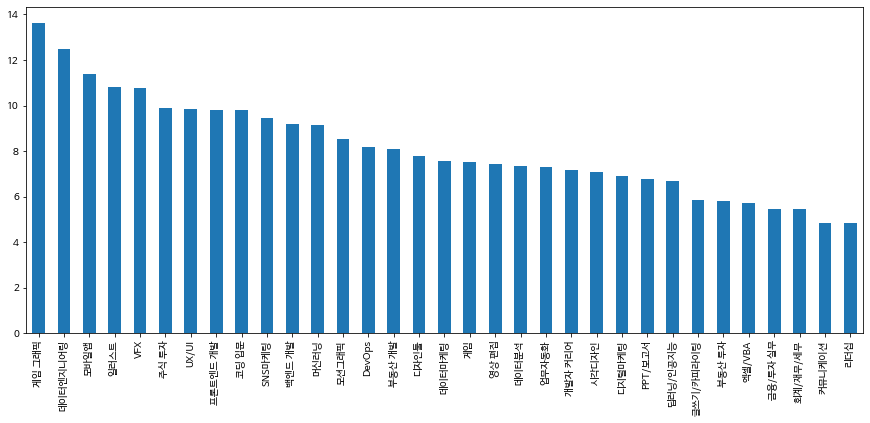

In [114]:
# 서브카테고리 별 환불 비율 그래프
df_refund_rate_sub.plot.bar(figsize = (15,6)) 

환불 비율이 높은 카테고리 및 서브카테고리 강의의 질을 개선하여 해결한다.



##결론 도출

카테고리 별 데이터를 이용한 매출 상승 방안

    - 매출이 높은 카테고리의 강의에 광고를 집중한다. 

    - 더 다양한 종류의 프로그래밍, 영상 편집 관련 강의를 제작한다

    - 해당 카테고리의 광고를 클릭하여 들어온 소비자에게는 그 강의에서 가장 인기가 높은 강의를 추천해준다.

    - 비인기 강의는 할인율이 높은 쿠폰을 따로 적용 가능하게 한다.

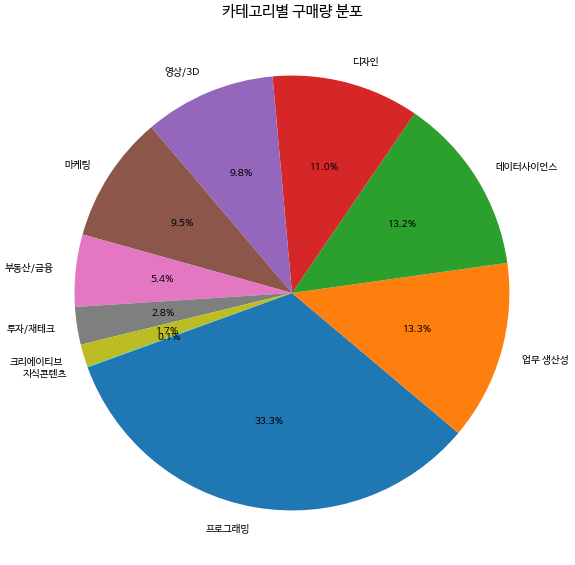

결제 시기 별 데이터를 이용한 매출 상승 방안

    매출액이 높게 나타난 시기
    - 7, 8월 (방학 시즌)
    - 일요일 (주말)
    - 30,31일 (월말)
    - 밤 시간인 21~23시

    위 시기에 광고를 집중한다면 효과적인 매출 상승을 기대할 수 있다.

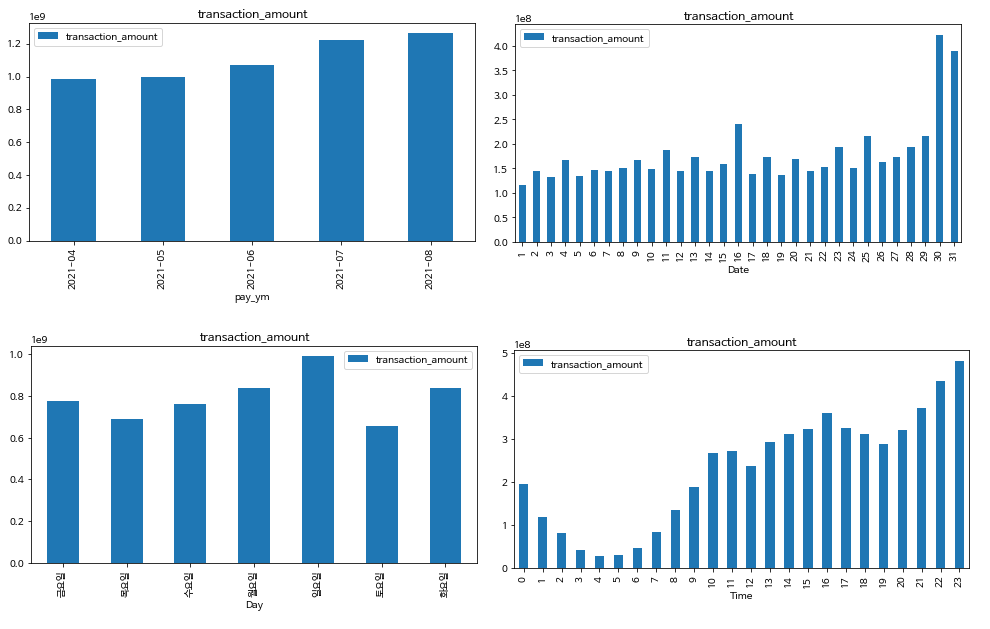

재구매를 유도하기 위한 방안

    

    - 강의를 1회만 수강한 사람에게 재구매자 비율이 높은 카테고리의 광고를 노출시킨다.

    - 강의를 1회 이상 구매한 사용자들에게 다른 강의에 높은 할인율을 적용할 수 있는 쿠폰을 제공한다.


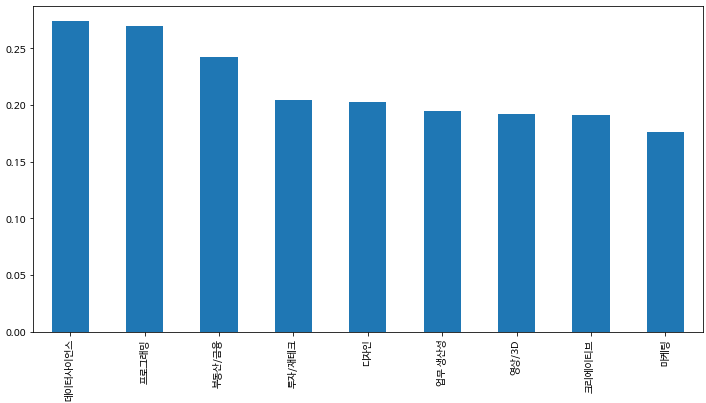

환불하는 이용자를 줄이기 위한 방안

    - 환불 비율이 높은 카테고리 및 서브카테고리 강의의 질을 개선하여 해결한다.

    - 쿠폰 사용 시에는 환불에 제약이 생기는 약관을 만든다

    - 결제 중 쿠폰 미사용자에게 쿠폰을 사용하라는 메시지를 띄운다

    - 환불 대신 다른 강의에 높은 할인율을 적용할 수 있는 쿠폰을 제공한다

    쿠폰 사용율을 늘리고 환불율을 줄여 매출 상승의 효과를 기대할 수 있을 것이다.

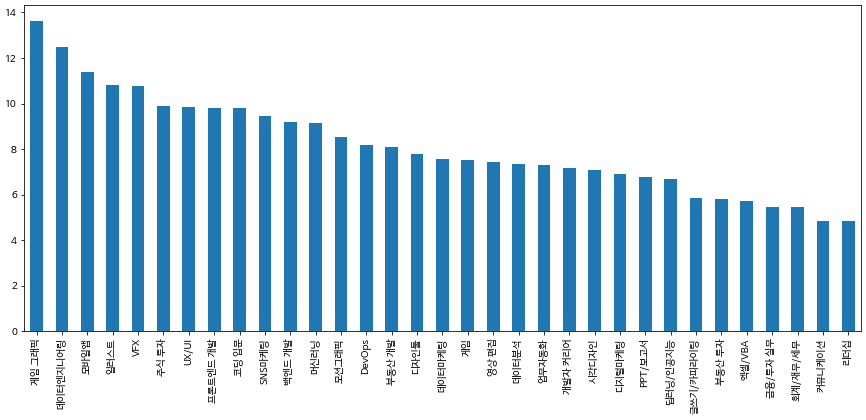